In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('strategy_performance.csv')
df.head()

,timestamp,strategy_id,total_trades,successful_trades,win_rate,risk_of_ruin,rate_of_return,annualized_return,annualized_volatility,total_pnl,...,max_consecutive_wins,max_consecutive_losses,max_drawdown,recovery_factor,skewness,kurtosis,calmar_ratio,var,cvar,ulcer_index
0,1682506913,NEARUSDT_1m_STRTGEZLMA100:20:20:0.002:0.05:1.5...,5,4,0.800000,86.647760,0.000377,0.019198,0.002263,0.721113,...,3,1,0.0001,7216.179038,0.051893,-2.032688,3.776426,0.000079,0.0,0.000045
1,1682506927,NEARUSDT_1m_STRTGEZLMA100:20:20:0.002:0.05:1.5...,6,5,0.833333,85.823784,0.000502,0.021315,0.002049,0.959808,...,4,1,0.0001,9604.800315,-0.092238,-1.794557,5.026458,0.000074,0.0,0.000041
2,1682506930,NEARUSDT_1m_STRTGEZLMA100:20:20:0.002:0.05:1.5...,7,6,0.857143,85.278823,0.000527,0.019158,0.001904,1.007544,...,5,1,0.0001,10082.494550,0.064845,-1.611199,5.276448,0.000069,0.0,0.000038
3,1682506931,NEARUSDT_1m_STRTGEZLMA100:20:20:0.002:0.05:1.5...,8,7,0.875000,84.891684,0.000592,0.018802,0.001764,1.130295,...,6,1,0.0001,11310.864019,0.103988,-1.345708,5.919288,0.000063,0.0,0.000035
4,1682506932,NEARUSDT_1m_STRTGEZLMA100:20:20:0.002:0.05:1.5...,9,8,0.888889,84.602482,0.000713,0.020153,0.001669,1.362158,...,7,1,0.0001,13631.117461,-0.014427,-1.171096,7.133541,0.000058,0.0,0.000033


In [3]:
downside_columns = ['max_drawdown', 'sharpe_ratio', 'sortino_ratio', 'recovery_factor', 'calmar_ratio', 'cvar', 'ulcer_index']
downside_df = df[downside_columns]

In [4]:
scaler = StandardScaler()
downside_df_scaled = scaler.fit_transform(downside_df)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

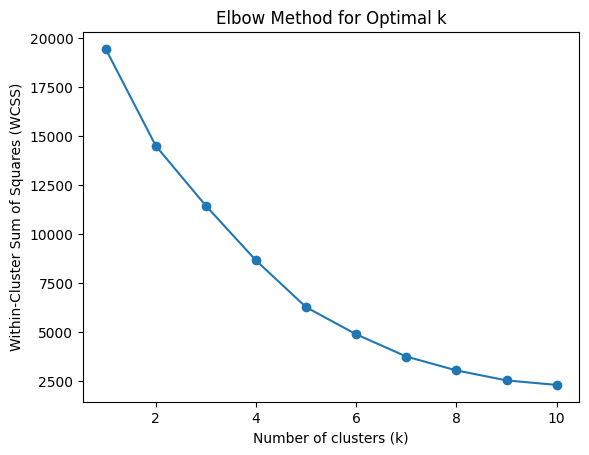

In [5]:
k_values = range(1, 11)

wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(downside_df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [6]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(downside_df_scaled)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
df['cluster'] = clusters

In [8]:
cluster_averages = df.groupby('cluster')['sharpe_ratio'].mean()
poorest_cluster = cluster_averages.idxmin()

In [9]:
poor_strategies_df = df[df['cluster'] == poorest_cluster]
poor_strategies_df.head(10)

,timestamp,strategy_id,total_trades,successful_trades,win_rate,risk_of_ruin,rate_of_return,annualized_return,annualized_volatility,total_pnl,...,max_consecutive_losses,max_drawdown,recovery_factor,skewness,kurtosis,calmar_ratio,var,cvar,ulcer_index,cluster
9,1682506967,NEARUSDT_1m_STRTGAOBB5:34:25:2:50:14:40:60:1.4...,5,2,0.4,110.025288,-0.000167,-0.00836,0.001496,-0.318256,...,3,0.0003,0.0,0.424263,-2.000003,-0.555616,0.0001,0.0,0.000205,3
